# Magical Forest Data Analysis

Special Thank You to Keith Galli: https://github.com/KeithGalli/Pandas-Data-Science-Tasks/blob/master/SalesAnalysis/SalesAnalysis.ipynb

### Adding in the libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Importing the data

In [2]:
df = pd.read_csv('Data - Opportuinty Village Analysis.csv')
df.head(10)

,Date,Time,Order Id,Category,Item,Quantity,Price
0,12/21/2023,5:48:13 PM,12600007,Cocoa,Small,1,3
1,12/21/2023,5:49:09 PM,12600008,Cocoa,Large,3,5
2,12/21/2023,5:49:43 PM,12600009,Water,Small Water,1,1
3,12/21/2023,5:54:22 PM,12600015,Cookies,Chocolate Chunk,1,3
4,12/21/2023,5:54:22 PM,12600015,Cookies,Peanut Butter,1,3
5,12/21/2023,5:54:22 PM,12600015,Cappuccino,Large,1,5
6,12/21/2023,5:54:22 PM,12600015,Cocoa,Small,2,3
7,12/21/2023,5:56:08 PM,12600016,Cocoa,Small,9,3
8,12/21/2023,6:01:50 PM,12600017,Cocoa,Small,1,3
9,12/21/2023,6:01:50 PM,12600017,Cookies,Chocolate Chunk,1,3


### Cleaning up the Data

#### Changing columns to correct type

In [3]:
df['Category'] = df['Category'].astype('string')
df['Item'] = df['Item'].astype('string')

In [4]:
for column in df.columns:
    print(f"Column '{column}' has dtype: {df[column].dtype}")

Column 'Date' has dtype: object
Column 'Time' has dtype: object
Column 'Order Id' has dtype: int64
Column 'Category' has dtype: string
Column 'Item' has dtype: string
Column 'Quantity' has dtype: int64
Column 'Price' has dtype: int64


#### Fixing Time so that it is correct Format

In [5]:
df['Time'] = df['Time'].str.replace('FM', 'PM')
df['Time'] = df['Time'].str.replace('AM', 'PM')

#### Sorting Time to be from begging of day to end of night

In [6]:
df = df.sort_values(by='Time')


## Questions

### Question 1: What was the total amount sold?

#### New column named 'Total'

In [7]:
df['Total'] = df['Quantity'] * df['Price']

#### Plotting it

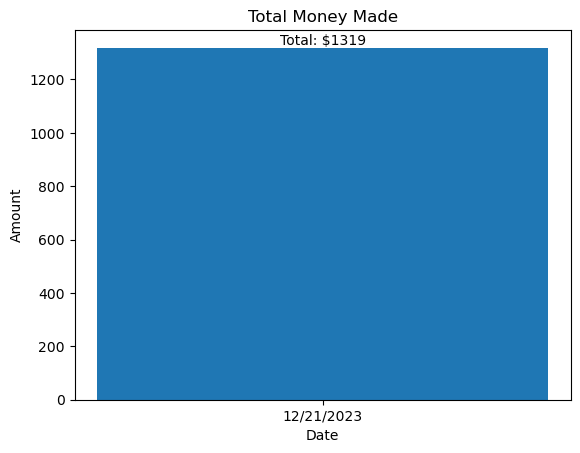

In [8]:
# Total amount of money made
total = df['Total'].sum()

# Plotting the total money as a single bar
plt.bar(df['Date'][0], total)
# Adding text annotation for the total money above the bar
plt.text(df['Date'][0], total + 10, f'Total: ${total}', ha='center')

plt.xlabel("Date")
plt.ylabel('Amount')
plt.title('Total Money Made')
plt.show()


### Question 2: What was the higest selling item sold (by Product)?

#### sum of categories

In [9]:
df.groupby('Category').sum()


,Date,Time,Order Id,Item,Quantity,Price,Total
Category,,,,,,,
Cappuccino,12/21/202312/21/202312/21/202312/21/202312/21/...,5:54:22 PM6:03:29 PM6:31:02 PM6:35:37 PM6:36:4...,302401986,LargeSmallSmallSmallLargeLargeLargeLargeLargeL...,34,102,138
Cocoa,12/21/202312/21/202312/21/202312/21/202312/21/...,5:48:13 PM5:49:09 PM5:54:22 PM5:56:08 PM6:01:5...,1083607368,SmallLargeSmallSmallSmallSmallSmallLargeSmallS...,171,352,705
Cookies,12/21/202312/21/202312/21/202312/21/202312/21/...,5:52:09 PM5:52:09 PM5:54:22 PM5:54:22 PM6:01:5...,1159207973,Chocolate ChunkDouble ChocolateChocolate Chunk...,130,276,390
Soda,12/21/202312/21/202312/21/202312/21/202312/21/...,6:09:06 PM6:42:07 PM6:42:07 PM6:49:52 PM6:49:5...,214201444,Not SpecifiedDiet CokeSpriteOrange FantaDr. Pe...,22,34,44
Water,12/21/202312/21/202312/21/202312/21/202312/21/...,5:49:43 PM6:09:06 PM6:11:06 PM6:18:13 PM6:31:0...,352802410,Small WaterSmall WaterSmall WaterSmall WaterSm...,42,28,42


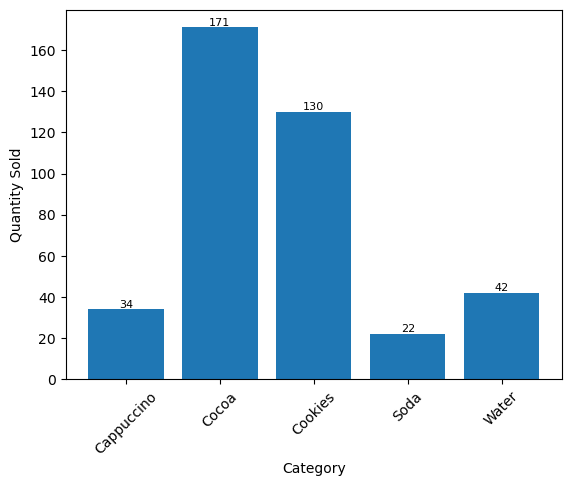

In [10]:
categories = df.groupby('Category').groups.keys()
total_quantity = df.groupby('Category')['Quantity'].sum()

plt.bar(categories, total_quantity, color='blue')
plt.ylabel('Quantity Sold')
plt.xlabel('Category')
plt.xticks(rotation=45)  # Set rotation and font size for x-axis labels

# Adding labels directly to the bars
plt.bar_label(plt.bar(categories, total_quantity), fontsize=8)

plt.show()


### Question 3: What was the higest selling item sold (by Item)?

In [11]:
df.groupby(['Item']).sum()


,Date,Time,Order Id,Category,Quantity,Price,Total
Item,,,,,,,
Chocolate Chunk,12/21/202312/21/202312/21/202312/21/202312/21/...,5:52:09 PM5:54:22 PM6:01:50 PM6:01:50 PM6:07:5...,541803717,CookiesCookiesCookiesCookiesCookiesCookiesCook...,68,129,204
Diet Coke,12/21/202312/21/202312/21/202312/21/202312/21/...,6:42:07 PM7:31:03 PM7:34:16 PM7:36:23 PM7:36:2...,75600527,SodaSodaSodaSodaSodaSoda,9,12,18
Double Chocolate,12/21/202312/21/202312/21/202312/21/202312/21/...,5:52:09 PM6:01:50 PM6:01:50 PM6:11:06 PM6:15:4...,239401332,CookiesCookiesCookiesCookiesCookiesCookiesCook...,24,57,72
Dr. Pepper,12/21/202312/21/202312/21/202312/21/2023,6:49:52 PM7:42:19 PM7:45:37 PM8:08:07 PM,50400388,SodaSodaSodaSoda,4,8,8
Large,12/21/202312/21/202312/21/202312/21/202312/21/...,5:49:09 PM5:54:22 PM6:07:59 PM6:16:58 PM6:22:5...,781205279,CocoaCappuccinoCocoaCocoaCocoaCocoaCocoaCocoaC...,114,310,570
Not Specified,12/21/202312/21/202312/21/2023,6:09:06 PM7:38:23 PM7:50:38 PM,37800227,SodaSodaSoda,4,6,8
Oatmeal Raisin,12/21/202312/21/202312/21/202312/21/202312/21/...,6:39:54 PM7:07:51 PM7:43:44 PM7:46:58 PM7:55:3...,63000434,CookiesCookiesCookiesCookiesCookies,5,15,15
Orange Fanta,12/21/2023,6:49:52 PM,12600049,Soda,2,2,4
Peanut Butter,12/21/202312/21/202312/21/202312/21/202312/21/...,5:54:22 PM6:19:18 PM6:50:38 PM7:01:25 PM7:07:5...,289802437,CookiesCookiesCookiesCookiesCookiesCookiesCook...,31,69,93


#### Adding new column to concat Category with Item

In [12]:
df['Item + Category'] = df['Category'] + ' - ' + df['Item']

In [13]:
df.head()

,Date,Time,Order Id,Category,Item,Quantity,Price,Total,Item + Category
0,12/21/2023,5:48:13 PM,12600007,Cocoa,Small,1,3,3,Cocoa - Small
1,12/21/2023,5:49:09 PM,12600008,Cocoa,Large,3,5,15,Cocoa - Large
2,12/21/2023,5:49:43 PM,12600009,Water,Small Water,1,1,1,Water - Small Water
67,12/21/2023,5:52:09 PM,12600051,Cookies,Chocolate Chunk,1,3,3,Cookies - Chocolate Chunk
66,12/21/2023,5:52:09 PM,12600051,Cookies,Double Chocolate,1,3,3,Cookies - Double Chocolate


In [14]:
items = df.groupby('Item + Category')['Quantity'].sum() # Gives us the total quantity sold
items

Item + Category
Cappuccino - Large            18
Cappuccino - Small            16
Cocoa - Large                 96
Cocoa - Small                 75
Cookies - Chocolate Chunk     68
Cookies - Double Chocolate    24
Cookies - Oatmeal Raisin       5
Cookies - Peanut Butter       31
Cookies - Sugar                2
Soda - Diet Coke               9
Soda - Dr. Pepper              4
Soda - Not Specified           4
Soda - Orange Fanta            2
Soda - Sprite                  3
Water - Small Water           42
Name: Quantity, dtype: int64

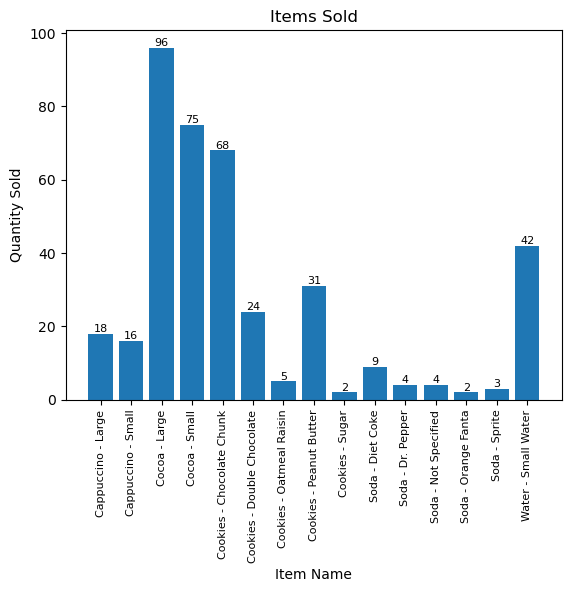

In [15]:
items = items.reset_index() # IDK why but this works
graph = plt.bar(items['Item + Category'], items['Quantity'])
plt.title('Items Sold')
plt.ylabel('Quantity Sold')
plt.xlabel('Item Name')
plt.xticks(rotation='vertical', fontsize=8)
plt.bar_label(graph, labels=items['Quantity'], label_type='edge', fontsize=8)

plt.show()

### Question 4: Which hour sold the most?

#### New Columns

In [16]:
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute
df['Updated Time'] = 1
df.head()

C:\Users\jgmot\AppData\Local\Temp\ipykernel_11540\107952606.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour
C:\Users\jgmot\AppData\Local\Temp\ipykernel_11540\107952606.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Minute'] = pd.to_datetime(df['Time']).dt.minute


,Date,Time,Order Id,Category,Item,Quantity,Price,Total,Item + Category,Hour,Minute,Updated Time
0,12/21/2023,5:48:13 PM,12600007,Cocoa,Small,1,3,3,Cocoa - Small,17,48,1
1,12/21/2023,5:49:09 PM,12600008,Cocoa,Large,3,5,15,Cocoa - Large,17,49,1
2,12/21/2023,5:49:43 PM,12600009,Water,Small Water,1,1,1,Water - Small Water,17,49,1
67,12/21/2023,5:52:09 PM,12600051,Cookies,Chocolate Chunk,1,3,3,Cookies - Chocolate Chunk,17,52,1
66,12/21/2023,5:52:09 PM,12600051,Cookies,Double Chocolate,1,3,3,Cookies - Double Chocolate,17,52,1


#### Function Time!!!

In [17]:
def round_mins(mins):
    if 0 <= mins <= 7:
        mins = 0
    elif 8 <= mins <= 22:
        mins = 15
    elif 23 <= mins <= 37:
        mins = 30
    elif 38 <= mins <= 52:
        mins = 45
    else:
        mins = 0
    return mins


def adjust_rounding(mins, hour):
    if mins == 0 and hour != 23:  # Adjust to next hour if it's "00" except for 23:00
        hour += 1
    return hour, mins

df['Updated Time'] = df.apply(lambda row: f"{adjust_rounding(round_mins(row['Minute']), row['Hour'])[0]:02d}:{adjust_rounding(round_mins(row['Minute']), row['Hour'])[1]:02d}", axis=1)

df

,Date,Time,Order Id,Category,Item,Quantity,Price,Total,Item + Category,Hour,Minute,Updated Time
0,12/21/2023,5:48:13 PM,12600007,Cocoa,Small,1,3,3,Cocoa - Small,17,48,17:45
1,12/21/2023,5:49:09 PM,12600008,Cocoa,Large,3,5,15,Cocoa - Large,17,49,17:45
2,12/21/2023,5:49:43 PM,12600009,Water,Small Water,1,1,1,Water - Small Water,17,49,17:45
67,12/21/2023,5:52:09 PM,12600051,Cookies,Chocolate Chunk,1,3,3,Cookies - Chocolate Chunk,17,52,17:45
66,12/21/2023,5:52:09 PM,12600051,Cookies,Double Chocolate,1,3,3,Cookies - Double Chocolate,17,52,17:45
...,...,...,...,...,...,...,...,...,...,...,...,...
242,12/21/2023,8:44:42 PM,12600155,Cookies,Chocolate Chunk,4,3,12,Cookies - Chocolate Chunk,20,44,20:45
243,12/21/2023,8:46:03 PM,12600156,Cookies,Peanut Butter,1,3,3,Cookies - Peanut Butter,20,46,20:45
244,12/21/2023,8:46:03 PM,12600156,Cocoa,Small,1,3,3,Cocoa - Small,20,46,20:45
245,12/21/2023,8:46:20 PM,12600157,Cookies,Peanut Butter,2,3,6,Cookies - Peanut Butter,20,46,20:45


In [18]:
df['Quantity'].sum()

399

#### Bar Graph

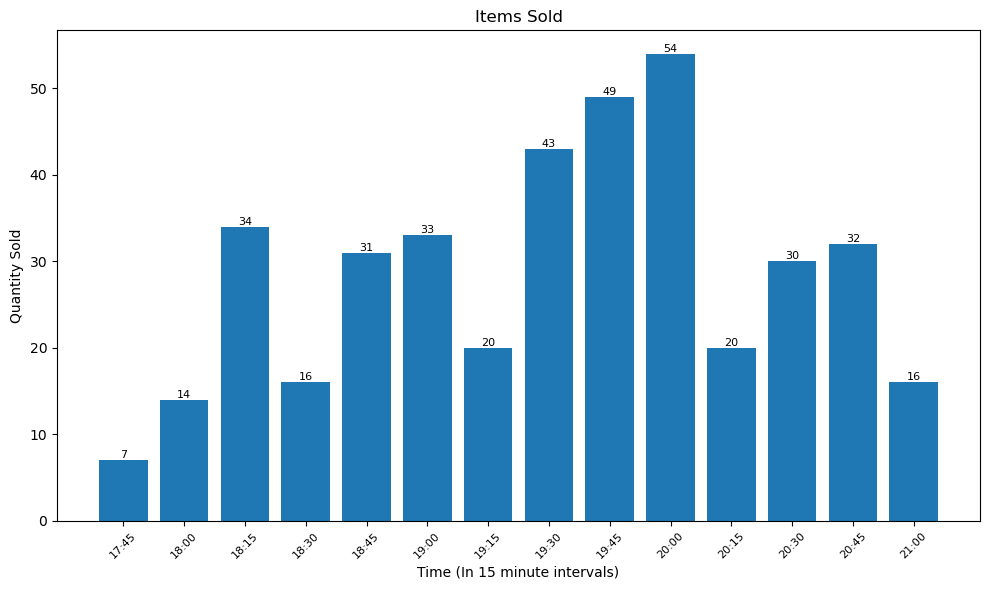

In [19]:
# Grouping by 'Updated Time' and summing the 'Quantity' column
total_quantity = df.groupby('Updated Time')['Quantity'].sum().reset_index()

# Creating the bar graph
plt.figure(figsize=(10, 6))  # Width By Height
graph = plt.bar(total_quantity['Updated Time'], total_quantity['Quantity'])

plt.title('Items Sold')
plt.ylabel('Quantity Sold')
plt.xlabel('Time (In 15 minute intervals)')
plt.xticks(rotation=45, fontsize=8)

# Adding labels to the bars
for bar, quantity in zip(graph, total_quantity['Quantity']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), quantity,
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()  # Adjusts the layout to prevent clipping of labels
plt.show()


#### Line Graph

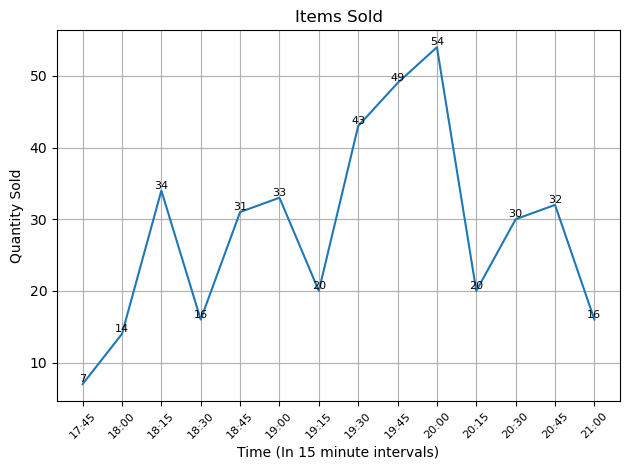

In [20]:
plt.plot(total_quantity['Updated Time'], total_quantity['Quantity'])
plt.title('Items Sold')
plt.ylabel('Quantity Sold')
plt.xlabel('Time (In 15 minute intervals)')
plt.xticks(rotation=45, fontsize=8)
plt.grid()

# Adding labels to the bars
for bar, quantity in zip(graph, total_quantity['Quantity']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), quantity,
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()  # Adjusts the layout to prevent clipping of labels
plt.show()


### Question 5: What items were bought together the most?

In [21]:
df.head()

,Date,Time,Order Id,Category,Item,Quantity,Price,Total,Item + Category,Hour,Minute,Updated Time
0,12/21/2023,5:48:13 PM,12600007,Cocoa,Small,1,3,3,Cocoa - Small,17,48,17:45
1,12/21/2023,5:49:09 PM,12600008,Cocoa,Large,3,5,15,Cocoa - Large,17,49,17:45
2,12/21/2023,5:49:43 PM,12600009,Water,Small Water,1,1,1,Water - Small Water,17,49,17:45
67,12/21/2023,5:52:09 PM,12600051,Cookies,Chocolate Chunk,1,3,3,Cookies - Chocolate Chunk,17,52,17:45
66,12/21/2023,5:52:09 PM,12600051,Cookies,Double Chocolate,1,3,3,Cookies - Double Chocolate,17,52,17:45


#### Joining the Order Id's Together

In [22]:
dataframe = df[df['Order Id'].duplicated(keep=False)]

dataframe['Grouped'] = dataframe.groupby('Order Id')['Item + Category'].transform(lambda x: ','.join(x))
df2 = dataframe[['Order Id', 'Grouped']].drop_duplicates()
df2

C:\Users\jgmot\AppData\Local\Temp\ipykernel_11540\412603646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Grouped'] = dataframe.groupby('Order Id')['Item + Category'].transform(lambda x: ','.join(x))


,Order Id,Grouped
67,12600051,"Cookies - Chocolate Chunk,Cookies - Double Cho..."
5,12600015,"Cappuccino - Large,Cookies - Chocolate Chunk,C..."
8,12600017,"Cocoa - Small,Cookies - Chocolate Chunk,Cookie..."
14,12600018,"Cappuccino - Small,Cocoa - Small"
16,12600019,"Cocoa - Large,Cookies - Chocolate Chunk"
...,...,...
234,12600153,"Cookies - Peanut Butter,Cookies - Double Choco..."
238,12600154,"Cocoa - Small,Cookies - Chocolate Chunk"
240,12600155,"Water - Small Water,Cappuccino - Small,Cookies..."
243,12600156,"Cookies - Peanut Butter,Cocoa - Small"


In [26]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
for key, value in count.most_common(10):
    print(f"{key},{value}")

('Cocoa - Small', 'Cookies - Chocolate Chunk'),14
('Cookies - Chocolate Chunk', 'Cookies - Peanut Butter'),9
('Cookies - Chocolate Chunk', 'Cookies - Double Chocolate'),7
('Cookies - Chocolate Chunk', 'Cocoa - Small'),6
('Cocoa - Large', 'Cookies - Chocolate Chunk'),6
('Cookies - Chocolate Chunk', 'Water - Small Water'),6
('Cocoa - Large', 'Cappuccino - Large'),6
('Cocoa - Small', 'Cookies - Peanut Butter'),6
('Water - Small Water', 'Cookies - Chocolate Chunk'),5
('Cookies - Double Chocolate', 'Cocoa - Large'),5


### Exporting the Data

In [25]:
df.to_excel('Data - Updated Data.xlsx')